In [38]:
import numpy as np
import itertools

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper')

In [63]:
sigma = np.arange(2, 11)
n_amino_acids = 20


In [64]:
n_amino_acids_per_degenerate_letter = n_amino_acids/sigma
n_amino_acids_per_degenerate_letter

array([10.        ,  6.66666667,  5.        ,  4.        ,  3.33333333,
        2.85714286,  2.5       ,  2.22222222,  2.        ])

In [67]:
ksizes = np.arange(5, 31, 5)
ksizes

array([ 5, 10, 15, 20, 25, 30])

> For the hydrophobic-polar alphabet, the median replacement rate is 10, and thus each HP k-mer represents ~10^k underlying protein sequences, and this is 10^k/2^k more underlying protein sequences than that could have been encoded in the original database. Here, we use k=24, and 10^24/2^24 = 5^24 = 6.0e+16 increase in encoded protein sequence


## Compute data augmentation rate for k=24

In [68]:
k = 24

augmentation_rate = k * np.log10(n_amino_acids_per_degenerate_letter/sigma)
augmentation_rate

array([ 16.7752801 ,   8.32289967,   2.32584031,  -2.32584031,
        -6.12654012,  -9.33998602, -12.12359948, -14.57892056,
       -16.7752801 ])

In [69]:
degenerate_aa_augmentation_k24 = pd.DataFrame(
    dict(
        sigma=sigma,
        n_amino_acids_per_degenerate_letter=n_amino_acids_per_degenerate_letter,
        augmentation_rate_log10=augmentation_rate,
    )
)
degenerate_aa_augmentation_k24['ksize'] = 24
degenerate_aa_augmentation_k24.head()

,sigma,n_amino_acids_per_degenerate_letter,augmentation_rate_log10,ksize
0,2,10.000000,16.77528,24
1,3,6.666667,8.32290,24
2,4,5.000000,2.32584,24
3,5,4.000000,-2.32584,24
4,6,3.333333,-6.12654,24


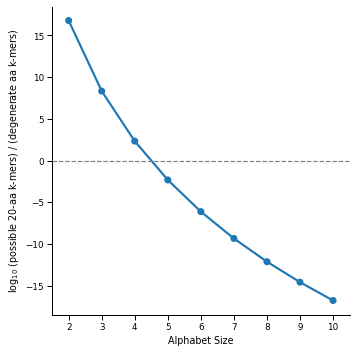

In [70]:
g = sns.catplot(data=degenerate_aa_augmentation_k24, x='sigma', y='augmentation_rate_log10', kind='point')
for ax in g.axes.flat:
    ax.axhline(y=0, linestyle='--', color='grey')
g.set_ylabels('$\log_{10}$ (possible 20-aa k-mers) / (degenerate aa k-mers)')
g.set_xlabels("Alphabet Size")

## Compute for all k-mer sizes

In [79]:
dfs = []
for ksize in ksizes:
    df = pd.DataFrame(
    dict(
        sigma=sigma,
        n_amino_acids_per_degenerate_letter=n_amino_acids_per_degenerate_letter,
        augmentation_rate_log10=ksize * np.log10(n_amino_acids_per_degenerate_letter/sigma),
    )
)
    df['ksize'] = ksize
    dfs.append(df)
degenerate_aa_augmentation = pd.concat(dfs, ignore_index=True)
degenerate_aa_augmentation

,sigma,n_amino_acids_per_degenerate_letter,augmentation_rate_log10,ksize
0,2,10.000000,3.494850,5
1,3,6.666667,1.733937,5
2,4,5.000000,0.484550,5
3,5,4.000000,-0.484550,5
4,6,3.333333,-1.276363,5
5,7,2.857143,-1.945830,5
6,8,2.500000,-2.525750,5
7,9,2.222222,-3.037275,5
8,10,2.000000,-3.494850,5
9,2,10.000000,6.989700,10


In [80]:
degenerate_aa_augmentation.query('augmentation_rate_log10 > 0').sigma.unique()

array([2, 3, 4])

In [81]:
np.sqrt(20)

4.47213595499958

if $x$ is the alphabet size and $k$ is the k-mer size, then the breaking point for when the number of theoretical proteins present in the underlying degenerate amino acid sequence is the same for all k-mer sizes,

$$
\begin{align}
\frac{(20/x)^k}{x^k} &= 1\\
\frac{20^k}{x^{2k}}  &= 1\\
20^k &= x^{2k}\\
x&= \sqrt{20}
\end{align}
$$

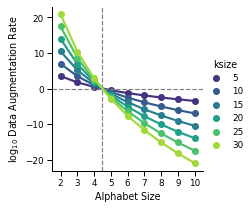

In [87]:
g = sns.catplot(
    data=degenerate_aa_augmentation,
    x="sigma",
    y="augmentation_rate_log10",
    kind="point",
    hue="ksize",
    height=3,
    palette='viridis'
)
for ax in g.axes.flat:
    ax.axhline(y=0, linestyle="--", color="grey")
    ax.axvline(x=np.sqrt(n_amino_acids)-2, linestyle='--', color='grey')
# g.set_ylabels("$\log_{10}$ (possible 20-aa k-mers) / (degenerate aa k-mers)")
g.set_ylabels("$\log_{10}$ Data Augmentation Rate")
g.set_xlabels("Alphabet Size")
g.savefig("../figures/300_degenerate_aa_augmentation_rate.pdf")


In [77]:
g.axes[0][0].get_xticks()

array([ 0,  1,  2,  3,  8, 13])

In [78]:
g.axes[0][0].get_xticklabels()

[Text(0, 0, '2'),
 Text(1, 0, '3'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(8, 0, '10'),
 Text(13, 0, '')]